# device counts per vulnerability
With Gnome patch, the numbers for distinct host doesn't match hostcount in panel. This raises question: why there are multiple entries per host for the same vuln?

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('max_columns', None)
pd.set_option('max_rows', 200) 

In [18]:
# NASA Plans showing as MISSION/CORP
vuln = "CESA-2018:3140 - Gnome Security, Bug Fix, and Enhancement Update - CentOS 7 x86_64"
df = pd.read_csv('/Users/kaipak/Desktop/cyber-vulnerability/data/itsec-edw/raw_files/ITSECEDW_12_10_2021.csv',
                encoding= 'unicode_escape', header=1)

In [19]:
df.nunique()

Center Name                    2
Security Plan                 86
Security Plan Name            28
Device Name                12810
DNS Name                   12864
NASA Severity                  4
Is Mission                     2
CVE List                    1320
Platform Type                 36
Platform Category              5
Operating System             399
Vulnerability Name          2193
Days Since Release Date      813
dtype: int64

In [20]:
df.shape

(178083, 13)

In [45]:
group = ['Device Name', 'DNS Name', 'NASA Severity', 'Is Mission', 
         'Platform Type', 'Platform Category', 'Vulnerability Name']
report = df.groupby(by=group).size().to_frame('vuln_count').reset_index().sort_values(by='vuln_count', ascending=False)
report = report.loc[report.vuln_count > 1]
report['Name+Vuln'] = report['Device Name'] + '/' + report['Vulnerability Name']

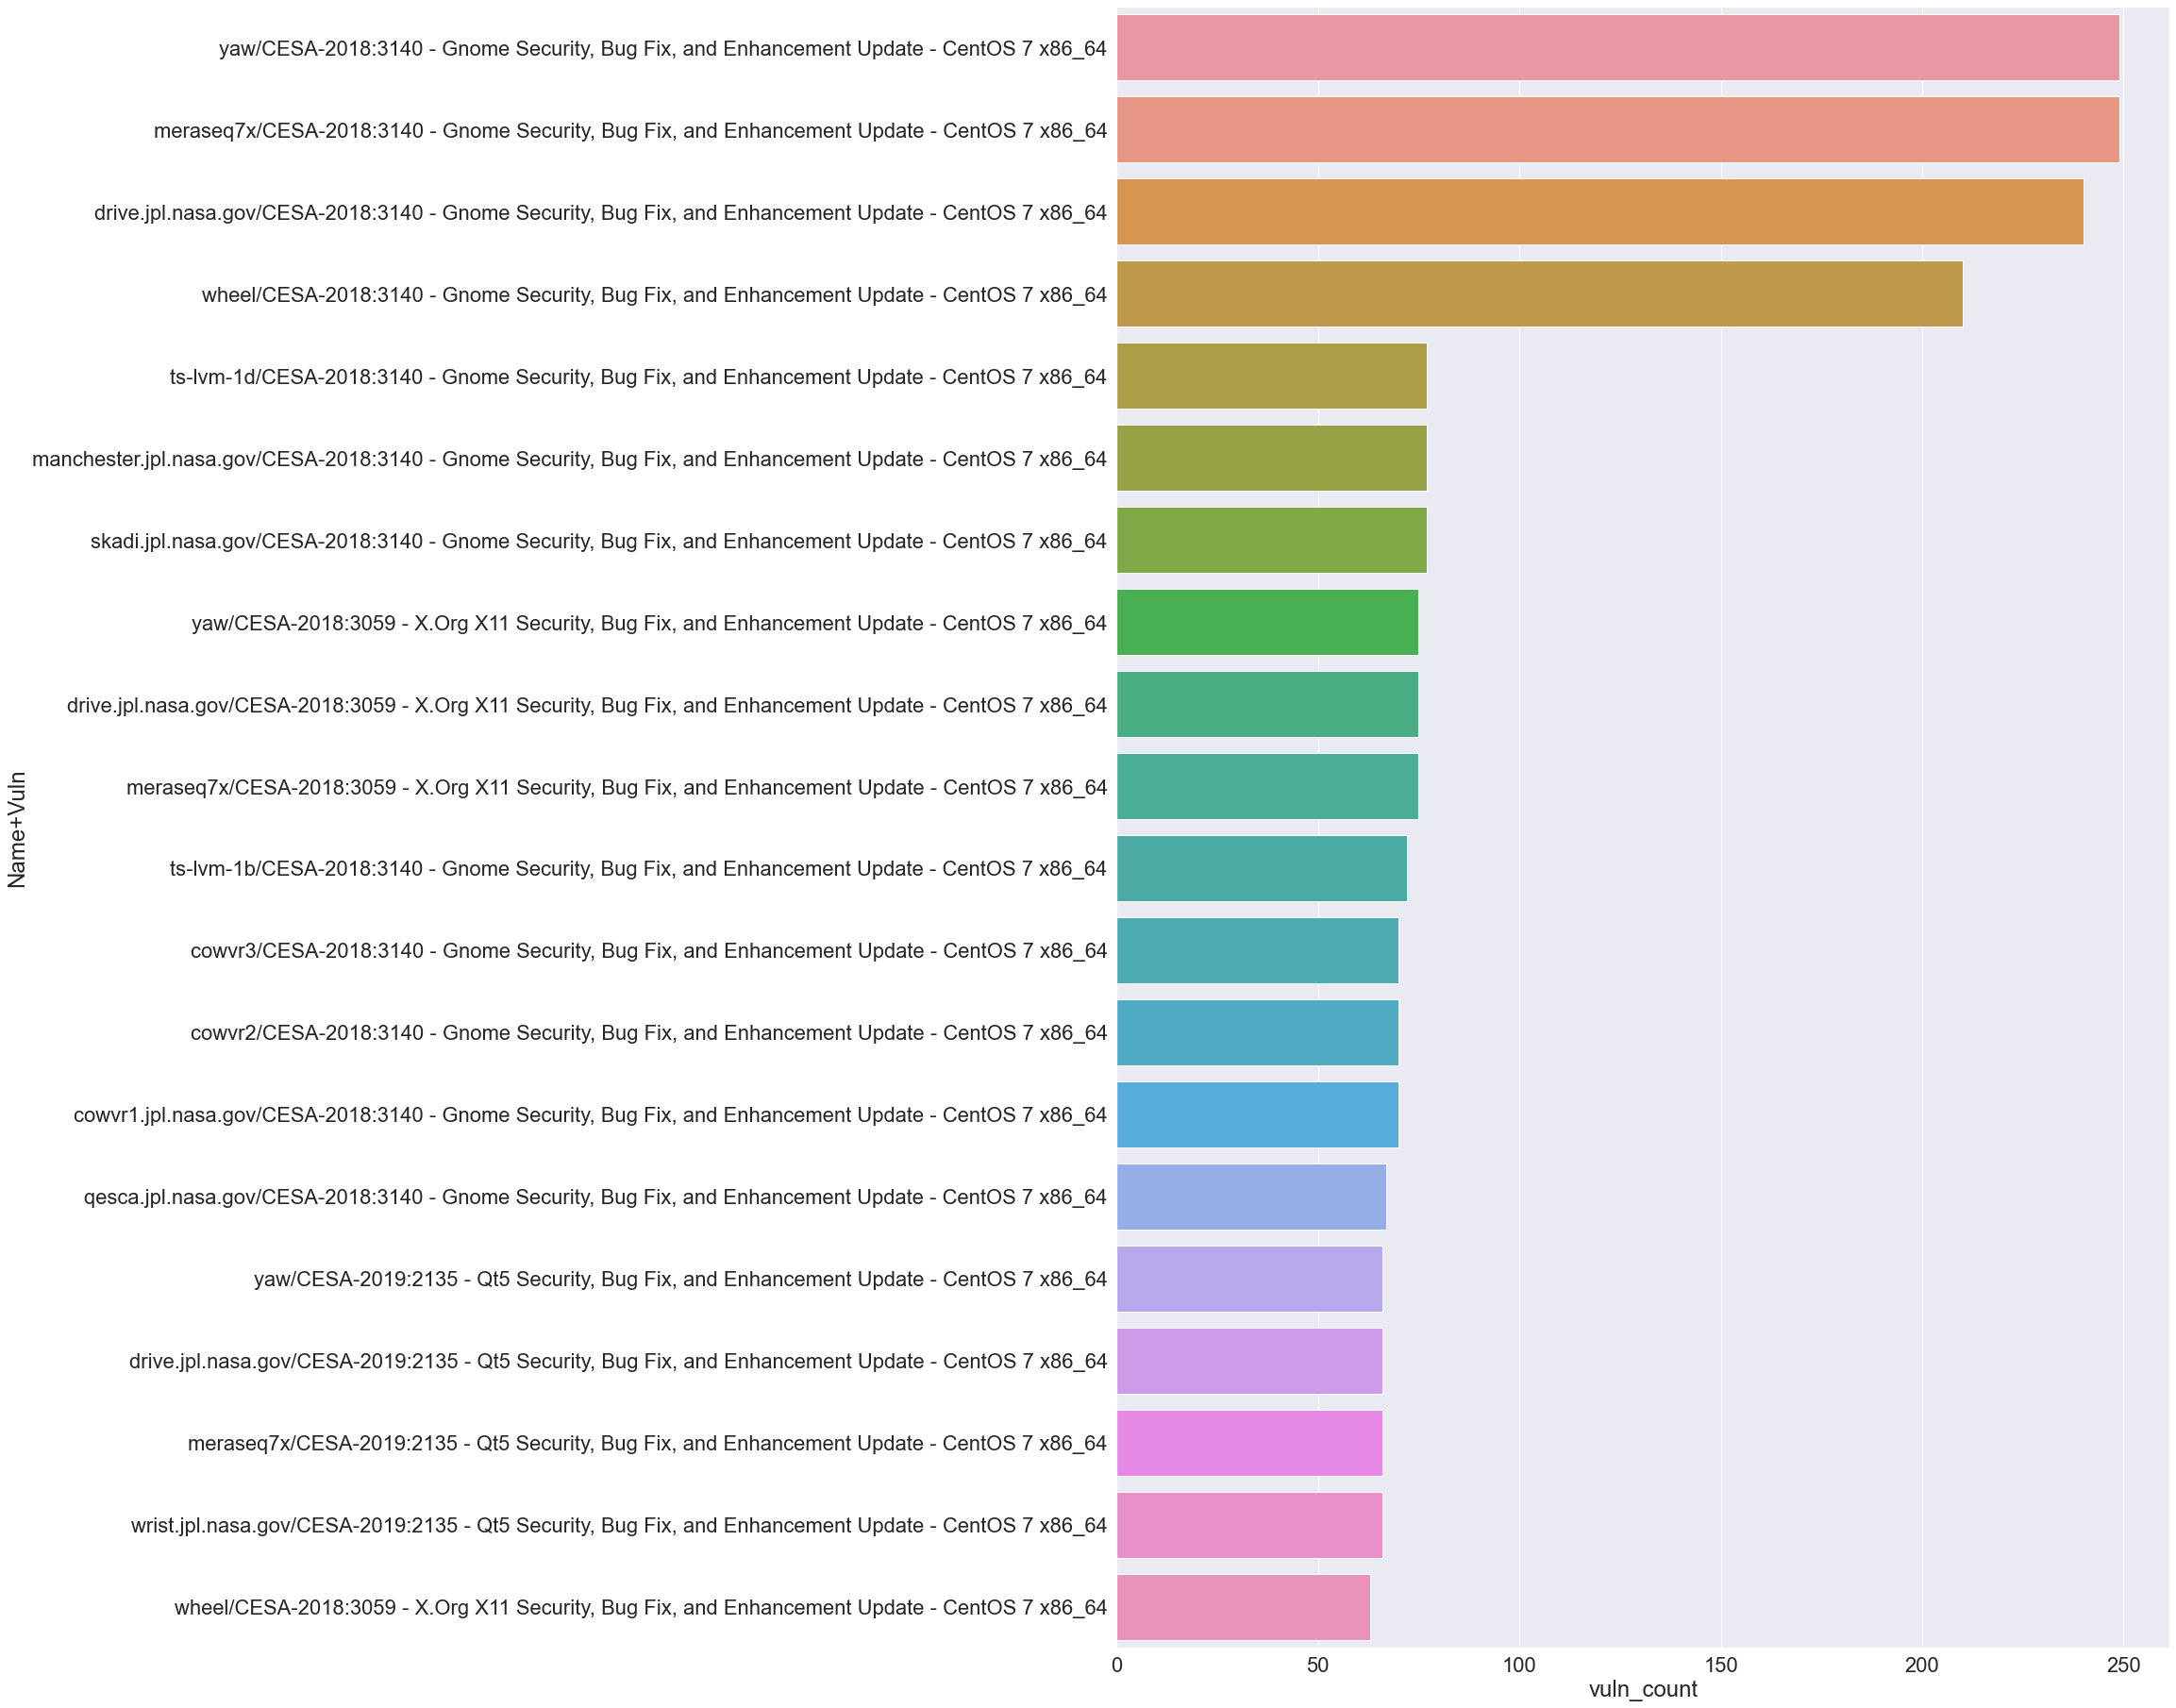

In [76]:
sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize=(20, 32))
plot = sns.barplot(data=report[:20], y='Name+Vuln', x='vuln_count', orient='h', ax=ax)

#plot.set_ylabel("Name+Vuln", fontsize=20)

In [40]:
report.to_csv('~/Desktop/host_vuln_multiple_reports.csv')

In [41]:
report.shape

(2846, 8)

In [68]:
nav_report = (
    df.loc[df['Security Plan Name'].str.contains("Navigation &", na=False)].
    groupby(by=['Security Plan', 'Security Plan Name', 'NASA Severity']).
    size().to_frame('Vuln Count').reset_index()
)

In [70]:
nav_report

,Security Plan,Security Plan Name,NASA Severity,Vuln Count
0,SC-9999-M-JPL-0490,Navigation & Mission Design Operations,Critical,36
1,SC-9999-M-JPL-0490,Navigation & Mission Design Operations,High,266
2,SC-9999-M-JPL-0490,Navigation & Mission Design Operations,Low,47
3,SC-9999-M-JPL-0490,Navigation & Mission Design Operations,Medium,722


<AxesSubplot:xlabel='NASA Severity', ylabel='Vuln Count'>

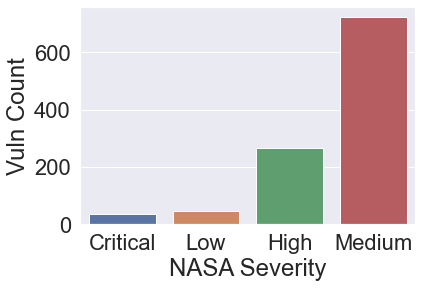

In [77]:
sns.barplot(data=nav_report.sort_values('Vuln Count'), x='NASA Severity', y='Vuln Count')

In [96]:
baz = df.loc[df['Security Plan Name'].str.contains("Navigation &", na=False)].groupby(by=['DNS Name', 'Vulnerability Name']).size().to_frame('count').reset_index().sort_values(by='count', ascending=False)

In [88]:
df.loc[df['Security Plan Name'].str.contains("Navigation &", na=False)].to_csv('~/Desktop/foo.csv')

In [91]:
baz.shape

(1071, 8)

In [97]:
baz[baz['count'] > 1]

,DNS Name,Vulnerability Name,count


In [98]:
baz

,DNS Name,Vulnerability Name,count
0,capella.fltops.jpl.nasa.gov,RHSA-2017:2492 - Xmlsec1 Security Update - Red...,1
719,pictor.fltops.jpl.nasa.gov,RHSA-2020:1176 - Avahi Security Update - Red H...,1
705,pictor.fltops.jpl.nasa.gov,RHSA-2020:0550 - Openjpeg2 Security Update - R...,1
706,pictor.fltops.jpl.nasa.gov,RHSA-2020:0630 - Ppp Security Update - Red Hat...,1
707,pictor.fltops.jpl.nasa.gov,RHSA-2020:0704 - Xerces-C Security Update - Re...,1
...,...,...,...
362,dorado.fltops.jpl.nasa.gov,"RHSA-2020:4035 - Webkitgtk4 Security, Bug Fix,...",1
363,dorado.fltops.jpl.nasa.gov,RHSA-2020:4039 - Openexr Security Update - Red...,1
364,dorado.fltops.jpl.nasa.gov,RHSA-2020:4072 - Libcroco Security Update - Re...,1
365,dorado.fltops.jpl.nasa.gov,RHSA-2020:4187 - Spice And Spice-Gtk Security ...,1


In [100]:
df_raw = pd.read_csv("/Users/kaipak/Desktop/cyber-vulnerability/data/itsec-edw/cleaned_files/ALL_SEVERITIES/historical/raw/ITSECEDW_12_10_2021.csv")

/Users/kaipak/miniconda3/envs/kai/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [103]:
(df_raw.loc[df_raw['Security Plan Name'].str.contains("Navigation &", na=False)].
    groupby(by=['Security Plan', 'Security Plan Name', 'NASA Severity']).
    size().to_frame('Vuln Count').reset_index()
)

,Security Plan,Security Plan Name,NASA Severity,Vuln Count
0,SC-9999-M-JPL-0257,Navigation & Mission Design,High,18
1,SC-9999-M-JPL-0257,Navigation & Mission Design,Low,9
2,SC-9999-M-JPL-0257,Navigation & Mission Design,Medium,85
3,SC-9999-M-JPL-0490,Navigation & Mission Design Operations,Critical,28
4,SC-9999-M-JPL-0490,Navigation & Mission Design Operations,High,266
5,SC-9999-M-JPL-0490,Navigation & Mission Design Operations,Low,47
6,SC-9999-M-JPL-0490,Navigation & Mission Design Operations,Medium,681


In [109]:
(
    df.loc[df['Security Plan Name'].str.contains("Navigation &", na=False)].groupby(by=['Security Plan',
                                                                                    'Operating System',
                                                                                    'NASA Severity']).
    size().
    to_frame()
)

0
Security Plan      Operating System                                   NASA Severity     
SC-9999-M-JPL-0490 Linux Red Hat Enterprise Workstation 7.4 (3.10.... Critical        36
                                                                      High           266
                                                                      Low             47
                                                                      Medium         722